https://github.com/gibachan/anomaly-detection/blob/master/ch03/3_3_2_local_outlier_facor.py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/Davis.csv", index_col='Unnamed: 0')
df.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [3]:
# データセット概要
df.describe()

,weight,height,repwt,repht
count,200.000000,200.000000,183.000000,183.000000
mean,65.800000,170.020000,65.622951,168.497268
std,15.095009,12.007937,13.776669,9.467048
min,39.000000,57.000000,41.000000,148.000000
25%,55.000000,164.000000,55.000000,160.500000
50%,63.000000,169.500000,63.000000,168.000000
75%,74.000000,177.250000,73.500000,175.000000
max,166.000000,197.000000,124.000000,200.000000


In [4]:
# 訓練データとテストデータに分割
df = df.drop(['sex', 'repwt', 'repht'], axis=1)
X_train = df
X_test = df

In [5]:
# 近傍有効距離の計算
def reachability_dist(knn, xs, xs_idx, xt, xt_idx):
    xs_distk, xs_idxk = knn.kneighbors([xs])
    xt_distk, xt_idxk = knn.kneighbors([xt])
    if xs_idx in xt_idxk and xt_idx in xs_idxk:
        return np.max(xt_distk)
    else:
        return np.sum((xs - xt)**2)**0.5

In [6]:
def local_outlier_factor(X_train, X_test, num_k=5):
    # k近傍法
    knn = NearestNeighbors(n_neighbors=num_k)
    knn.fit(X_train)
    # テストデータの計算
    anom_score = []
    for i, x1 in X_test.iterrows():
        # x1 のk近傍計算
        x1_distk, x1_idxk = knn.kneighbors([x1])
        # 有効近傍距離の計算
        numerator = 0
        for j in x1_idxk[0]:
            x2 = X_train.iloc[j]
            numerator += reachability_dist(knn, x1, i,  x2, j)
        numerator /= num_k
        denominator = 0
        for j in x1_idxk[0]:
            x2 = X_train.iloc[j]
            x2_distk, x2_idxk = knn.kneighbors([x2])
            for k in x2_idxk[0]:
                x3 = X_train.iloc[k]
                denominator += numerator / reachability_dist(knn, x2, j,  x3, k) / num_k
        a_x1 = denominator / num_k
        anom_score.append(a_x1)
    return anom_score

In [7]:
a = local_outlier_factor(X_train, X_test)

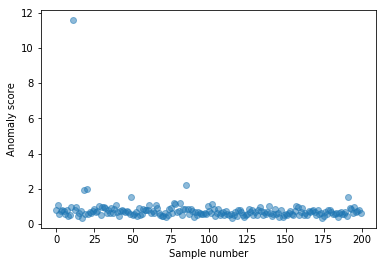

In [8]:
plt.xlabel('Sample number')
plt.ylabel('Anomaly score')
plt.plot(a, 'o', alpha=.5)
plt.show()